# Exercise 2

## Setup

In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import seaborn as sns
import math
import statistics

In [38]:
birds = pd.read_csv('./birds2025.csv', sep=';')
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B


## Tasks

### Subtask a

Replace interval columns with mean values.

In [39]:
def meanval(a: str) -> float:
    a_split = a.split('-')
    return (float(a_split[0]) + float(a_split[1])) / 2

In [40]:
birds['mean_length'] = birds['length'].apply(lambda x: meanval(x))
birds['mean_wspan'] = birds['wspan'].apply(lambda x: meanval(x))
birds['mean_weight'] = birds['weight'].apply(lambda x: meanval(x))
birds.drop(columns=['length', 'wspan', 'weight'], inplace=True)
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0


Compute BMI and WSI

In [41]:
birds['BMI'] = (birds['mean_weight'] / 1000) / (birds['mean_length'] / 100) ** 2
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959


In [42]:
birds['WSI'] = birds['mean_wspan'] / birds['mean_length']
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


Split dataset.

In [43]:
birds.set_index('species', inplace=True)
groups = birds["group"]
birds.drop(columns=['group'], inplace=True)
birds.head()

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
species,,,,,,,,,,
naurulokki,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
harmaalokki,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
isolokki,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
kalatiira,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
lapintiira,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


Assess numerical feature distribution.

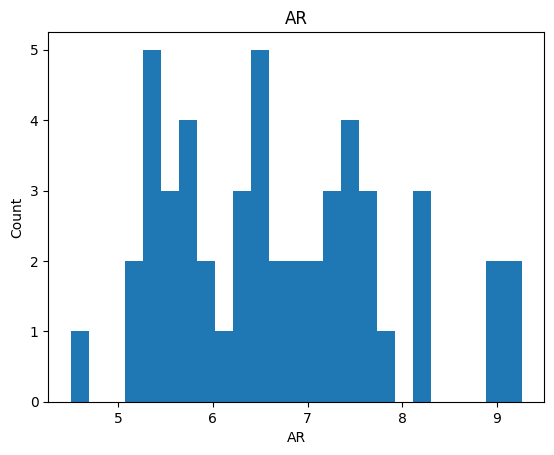

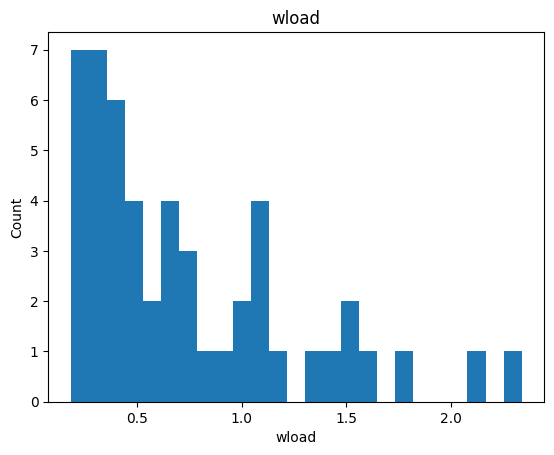

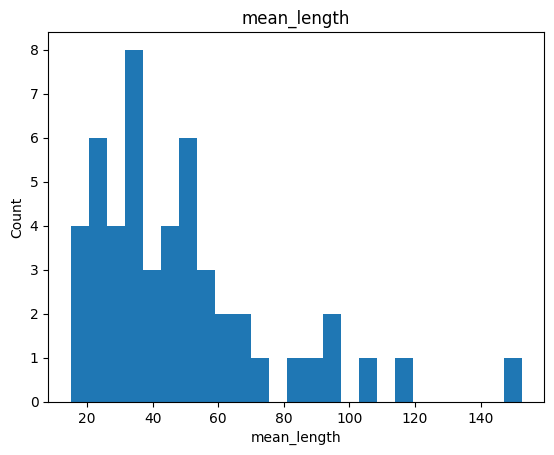

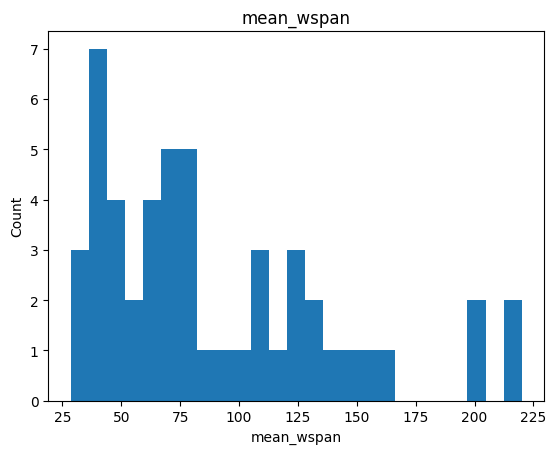

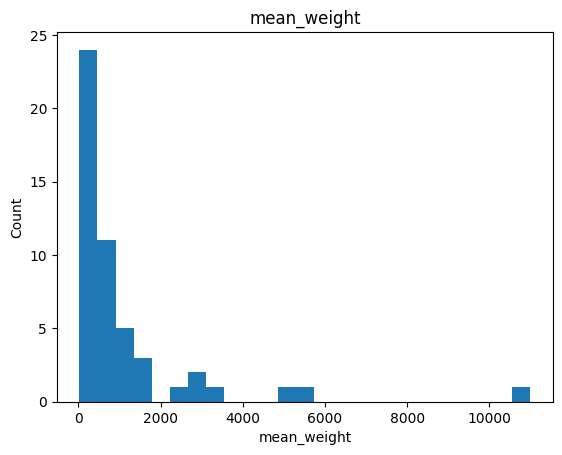

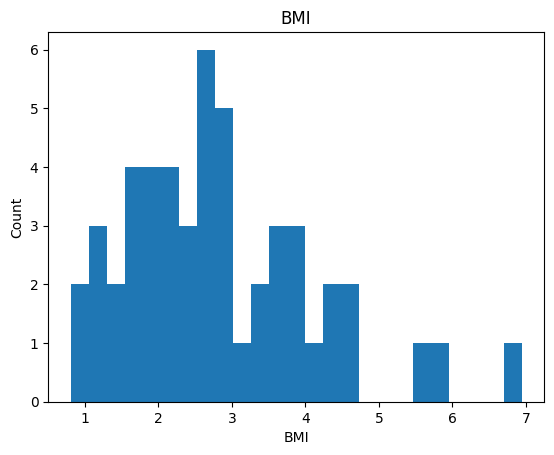

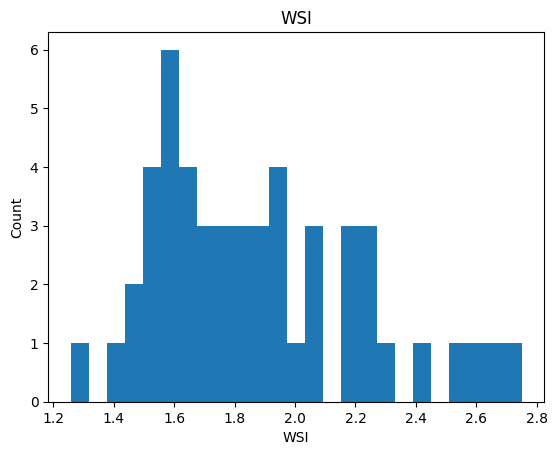

In [44]:
for i in birds.select_dtypes(include=['float64']).columns:
    plt.hist(birds[i], bins = 25)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

Scale numerical features.

In [45]:
scaler = MinMaxScaler()
num_cols = birds.select_dtypes(include=['float64']).columns
birds[num_cols] = pd.DataFrame(scaler.fit_transform(birds[num_cols]), columns=num_cols, index=birds.index)
birds.head()

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
species,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.152727,0.334204,0.022779,0.214481,0.879054
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.327273,0.558747,0.093394,0.343958,0.670654
isolokki,0.785714,0.222222,bluish grey,white,B,0.367273,0.624021,0.125285,0.400416,0.671464
kalatiira,0.974790,0.027778,grey,white,B,0.174545,0.242820,0.008884,0.000000,0.446080
lapintiira,0.939076,0.009259,grey,white,B,0.145455,0.224543,0.007745,0.015081,0.526316


Pairwise distances based on numerical features.

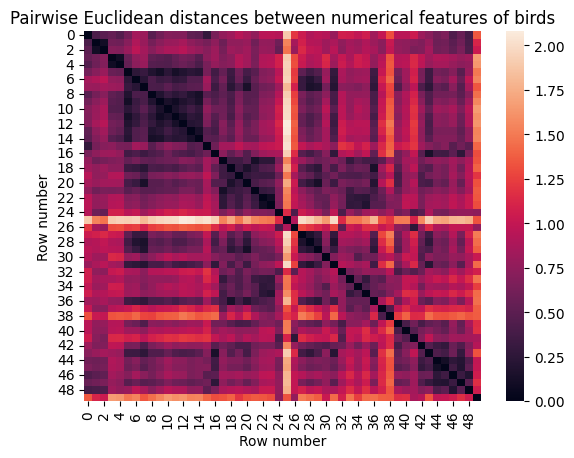

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.412240,0.494961,0.537179,0.458502,0.614269,0.844823,0.798031,0.483868,0.602311,...,0.945243,1.045541,0.806295,0.720158,0.606286,0.658066,0.431060,0.557765,0.378187,1.351111
1,0.412240,0.000000,0.100755,0.607504,0.588298,0.713402,0.894036,0.788759,0.624433,0.722079,...,0.742517,0.708791,0.667645,0.790164,0.580133,0.601454,0.489592,0.597813,0.404217,1.111911
2,0.494961,0.100755,0.000000,0.693322,0.678988,0.793716,0.963168,0.843763,0.709864,0.806920,...,0.745752,0.656002,0.676412,0.849024,0.604778,0.625901,0.522463,0.646808,0.425812,1.036811
3,0.537179,0.607504,0.693322,0.000000,0.097289,0.558724,0.747743,0.806091,0.517132,0.479969,...,0.941824,1.122554,0.982712,0.819173,0.906038,0.893173,0.843769,0.772793,0.819415,1.658097
4,0.458502,0.588298,0.678988,0.097289,0.000000,0.527917,0.735403,0.788746,0.468235,0.450379,...,0.953783,1.136505,0.960636,0.781061,0.860565,0.856511,0.783774,0.727560,0.761523,1.634855
5,0.614269,0.713402,0.793716,0.558724,0.527917,0.000000,0.243948,0.302904,0.182761,0.112892,...,0.828375,1.069008,0.626720,0.334024,0.616545,0.584045,0.690634,0.476636,0.792848,1.488891
6,0.844823,0.894036,0.963168,0.747743,0.735403,0.243948,0.000000,0.226925,0.414222,0.317034,...,0.825348,1.103945,0.639994,0.325780,0.701961,0.642132,0.841146,0.566475,0.969449,1.545433
7,0.798031,0.788759,0.843763,0.806091,0.788746,0.302904,0.226925,0.000000,0.412983,0.403661,...,0.741083,0.959467,0.423306,0.253123,0.543506,0.481634,0.720250,0.465289,0.857201,1.340114
8,0.483868,0.624433,0.709864,0.517132,0.468235,0.182761,0.414222,0.412983,0.000000,0.182537,...,0.905566,1.088247,0.646703,0.434527,0.607821,0.603690,0.630586,0.503395,0.708963,1.453638
9,0.602311,0.722079,0.806920,0.479969,0.450379,0.112892,0.317034,0.403661,0.182537,0.000000,...,0.889452,1.125469,0.717948,0.437411,0.699389,0.671926,0.745136,0.554984,0.826393,1.556032


In [46]:
cdist_matrix = cdist(birds[num_cols], birds[num_cols], metric='euclidean')
sns.heatmap(cdist_matrix)
plt.title('Pairwise Euclidean distances between numerical features of birds')
plt.xlabel('Row number')
plt.ylabel('Row number')
plt.show()
display(pd.DataFrame(cdist_matrix))

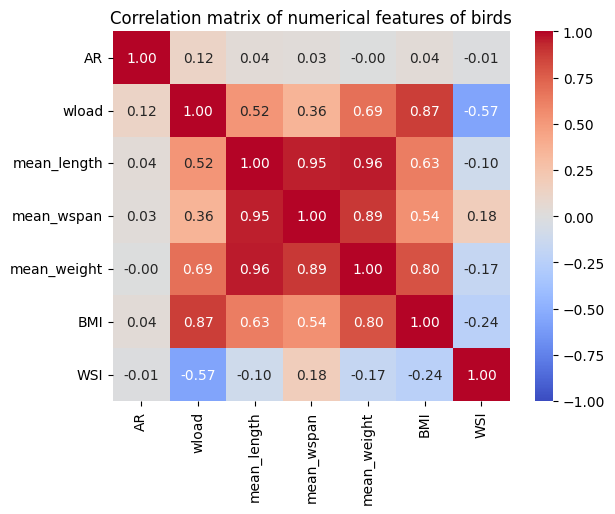

In [47]:
# Numerical feature correlations
corr = birds[num_cols].corr(method="spearman")
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of numerical features of birds')
plt.show()

In [48]:
#birds = birds.drop(columns=["mean_length"])
#num_cols = birds.select_dtypes(include=['float64']).columns

### Subtask b

Identify categorical features.

In [49]:
categ_cols = birds.select_dtypes(include=['object']).columns

Defining distance measure for color features.

In [50]:
main_colors = ['black', 'white', 'brown', 'grey', 'beige']

def split_color(a: str) -> list:
    if '-' in a:
        a_split = a.split('-')
    elif ' ' in a:
        a_split = a.split(' ')
    else:
        a_split = [a]
    return a_split

def color_similarity(a: str, b: str) -> float:
    a_split = split_color(a)
    b_split = split_color(b)

    intersection = set(a_split).intersection(set(b_split))
    
    if a_split == b_split: # exact match
        return 1.0
    elif any(i_color in main_colors for i_color in intersection): # same main color
        return 0.5
    else: # no match
        return 0.0


Overlap distance.

In [51]:
def get_categ_dist(row1, row2) -> float:
    sim = 0.0

    for col in categ_cols:
        sim += color_similarity(row1[col], row2[col])

    return 1-(sim / len(categ_cols))


Combined pairwise distance (numerical + categorical).

In [52]:
def l2(row_1, row_2):
    sum_of_squares = 0
    for col in num_cols:
        sum_of_squares += abs(row_1[col] - row_2[col]) ** 2
    dist = math.sqrt(sum_of_squares)
    return dist

def calculate_pairwise_distance(df, distance_function):
    num_rows = len(df)
    distances = [[0.0] * num_rows for _ in range(num_rows)]
    for i in range(num_rows):
        for j in range(num_rows): #Calculating 2 times, just to doublecheck
            row_1 = df.iloc[i]
            row_2 = df.iloc[j]

            dist = distance_function(row_1, row_2)
            distances[i][j] = dist

    return pd.DataFrame(distances)

def create_distance_list(distances):
    distances_list = []
    for i in range(len(distances)):
        for j in range(i + 1, len(distances)):
            distances_list.append(distances.iloc[i, j])
    return distances_list

def get_std_dev(distance_list):
    std_dev = statistics.stdev(distance_list)
    print(f"Standard deviation of the distances: {std_dev}")
    return std_dev

In [53]:
# Numerical features
pairwise_distances = calculate_pairwise_distance(birds, l2)

l2_distance_list = create_distance_list(pairwise_distances)

l2_std = get_std_dev(l2_distance_list)

Standard deviation of the distances: 0.3490177185764743


In [54]:
# Categorical features
categ_pairwise = calculate_pairwise_distance(birds, get_categ_dist)

categ_std = get_std_dev(create_distance_list(categ_pairwise))


Standard deviation of the distances: 0.2534869388690408


In [198]:
def mixed_metric(row1, row2):
    lambda_ = 0.6
    return lambda_*l2(row1, row2)/l2_std+(1-lambda_)*get_categ_dist(row1, row2)/categ_std

In [199]:
mixed_distances = calculate_pairwise_distance(birds, mixed_metric)
mixed_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.971685,1.113891,1.186468,1.051214,2.107989,2.504337,2.949894,1.883816,2.087433,...,1.887976,2.849394,2.438103,2.553023,2.357264,2.446281,2.319031,2.273852,2.228135,3.900699
1,0.971685,0.000000,0.173209,1.307365,1.274348,2.278411,2.588941,2.933954,2.125464,2.293327,...,1.802465,2.270485,2.199749,2.673371,2.312305,2.348959,2.419653,2.342698,2.272883,3.489488
2,1.113891,0.173209,0.000000,1.454896,1.430254,2.416480,2.707785,3.028513,2.272329,2.439178,...,1.808026,2.179734,2.214820,2.774557,2.354672,2.390985,2.476162,2.426927,2.310008,3.360383
3,1.186468,1.307365,1.454896,0.000000,0.167251,2.012501,2.337446,2.963750,1.941000,1.877114,...,2.145096,2.981788,2.478386,2.723241,2.872572,2.850455,3.028523,2.643509,2.986655,4.428442
4,1.051214,1.274348,1.430254,0.167251,0.000000,1.959542,2.316232,2.933932,1.856942,1.826245,...,2.165654,3.005771,2.440435,2.657722,2.794399,2.787430,2.925385,2.565748,2.887133,4.388486


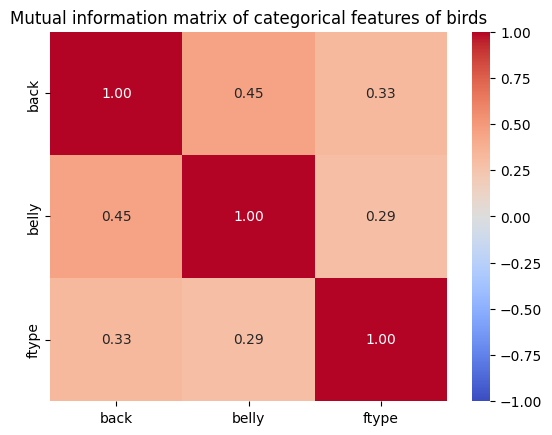

In [200]:
# Mutual information between categorical features
from sklearn.metrics import normalized_mutual_info_score

categ_data = birds[categ_cols].astype('category').apply(lambda x: x.cat.codes)
corr = categ_data.corr(method=normalized_mutual_info_score)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mutual information matrix of categorical features of birds')
plt.show()

### Subtask c

In [201]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, rand_score, adjusted_rand_score

In [202]:
mixed_distances = calculate_pairwise_distance(birds, mixed_metric)
mixed_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.971685,1.113891,1.186468,1.051214,2.107989,2.504337,2.949894,1.883816,2.087433,...,1.887976,2.849394,2.438103,2.553023,2.357264,2.446281,2.319031,2.273852,2.228135,3.900699
1,0.971685,0.000000,0.173209,1.307365,1.274348,2.278411,2.588941,2.933954,2.125464,2.293327,...,1.802465,2.270485,2.199749,2.673371,2.312305,2.348959,2.419653,2.342698,2.272883,3.489488
2,1.113891,0.173209,0.000000,1.454896,1.430254,2.416480,2.707785,3.028513,2.272329,2.439178,...,1.808026,2.179734,2.214820,2.774557,2.354672,2.390985,2.476162,2.426927,2.310008,3.360383
3,1.186468,1.307365,1.454896,0.000000,0.167251,2.012501,2.337446,2.963750,1.941000,1.877114,...,2.145096,2.981788,2.478386,2.723241,2.872572,2.850455,3.028523,2.643509,2.986655,4.428442
4,1.051214,1.274348,1.430254,0.167251,0.000000,1.959542,2.316232,2.933932,1.856942,1.826245,...,2.165654,3.005771,2.440435,2.657722,2.794399,2.787430,2.925385,2.565748,2.887133,4.388486


In [203]:
bird_map = {
    "charadriiformes": "1",
    "lari": "1.1",
    "laridae": "1.1.1",
    "sternidae": "1.1.2",
    "charadrii": "1.2",
    "scolopacidae": "1.2.1",
    "charadriidae": "1.2.2",
    "haematopodidae": "1.2.3",
    "anatidae": "2",
    "anatinae": "2.1",
    "dabbling ducks": "2.1.1",
    "diving ducks": "2.1.2",
    "anserinae": "2.2",
    "gruifores": "3",
    "gruidae": "3.1",
    "rallidae": "3.2",
    "phalacrocoracidae": "4",
    "podicipedidae": "5",
    "gaviidae": "6",
    "ardeidae": "7",
    "accipitriformes": "8",
    "accipitridae": "8.1"
}

In [204]:
birds['group'] = groups
birds['group_ID'] = birds['group'].map(bird_map)
birds

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI,group,group_ID,predicted_group
species,,,,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.152727,0.334204,0.022779,0.214481,0.879054,laridae,1.1.1,7
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.327273,0.558747,0.093394,0.343958,0.670654,laridae,1.1.1,7
isolokki,0.785714,0.222222,bluish grey,white,B,0.367273,0.624021,0.125285,0.400416,0.671464,laridae,1.1.1,7
kalatiira,0.974790,0.027778,grey,white,B,0.174545,0.242820,0.008884,0.000000,0.446080,sternidae,1.1.2,7
lapintiira,0.939076,0.009259,grey,white,B,0.145455,0.224543,0.007745,0.015081,0.526316,sternidae,1.1.2,7
suokukko,0.468487,0.083333,dappled brown,white,C,0.076364,0.099217,0.007745,0.144386,0.405667,scolopacidae,1.2.1,5
taivaanvuohi,0.296218,0.101852,dappled brown,white,C,0.080000,0.070496,0.006834,0.109788,0.239971,scolopacidae,1.2.1,5
lehtokurppa,0.247899,0.166667,dappled brown,dappled beige,C,0.145455,0.164491,0.025513,0.274415,0.306220,scolopacidae,1.2.1,4
karikukko,0.569328,0.125000,black-brown,white,C,0.054545,0.091384,0.007745,0.222778,0.527379,scolopacidae,1.2.1,5


In [205]:
def plot_dendrogram(model: AgglomerativeClustering, n_cluster, linkage, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    threshold = (linkage_matrix[-(n_cluster-1), 2] + linkage_matrix[-n_cluster, 2]) / 2
    dendrogram(linkage_matrix, color_threshold=threshold,  above_threshold_color='black', **kwargs)
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.title(f'Hierarchical clustering dendrogram\n(k={n_cluster}, linkage={linkage})')
    plt.xlabel('Sample biological group')
    plt.ylabel('Distance')
    plt.show()

In [206]:
def hier_clust(data, n_clusters, method):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, compute_distances=True, metric='precomputed')
    #model.fit(data)
    
    labels = model.fit_predict(data)
    plot_dendrogram(model, n_cluster=n_clusters, linkage=method, labels=birds['group_ID'], leaf_rotation=90)
    return labels

c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


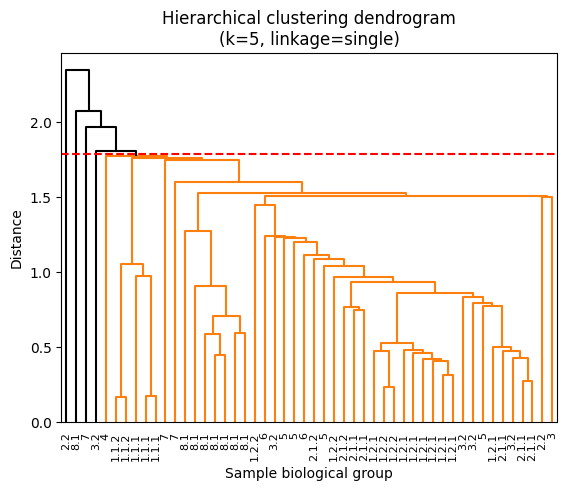

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 2]
Singletons:  4
k=5, method=single
Normalized Mutual Information Score: 0.2179858563767698
Adjusted Mutual Information Score: 0.00423856280150648
Rand Index: 0.21224489795918366
Adjusted Rand Index: 0.0024808765763903247


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


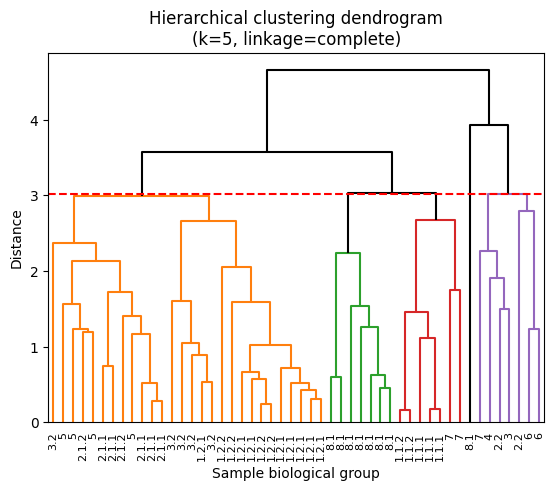

[3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 3 3 0 4 4 4 4 4 4 4 2]
Singletons:  1
k=5, method=complete
Normalized Mutual Information Score: 0.6500714091670474
Adjusted Mutual Information Score: 0.5214594180897194
Rand Index: 0.7053061224489796
Adjusted Rand Index: 0.22935701477243617


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


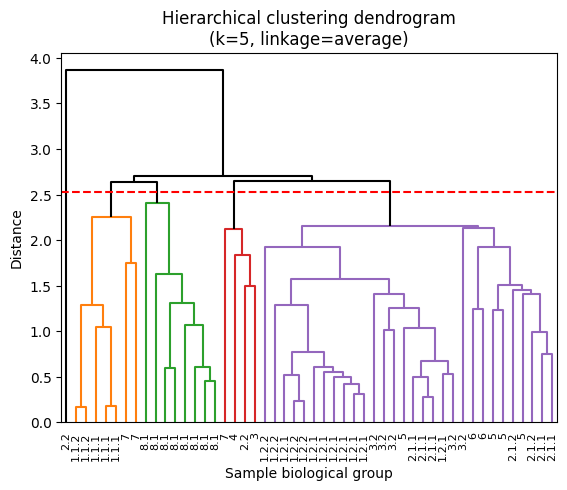

[1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 3 4 2 2 2 2 2 4 2 2 2 2
 2 2 1 1 4 0 0 0 0 0 0 0 0]
Singletons:  1
k=5, method=average
Normalized Mutual Information Score: 0.6461642812104187
Adjusted Mutual Information Score: 0.5185310072805954
Rand Index: 0.6751020408163265
Adjusted Rand Index: 0.21899529042386184


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


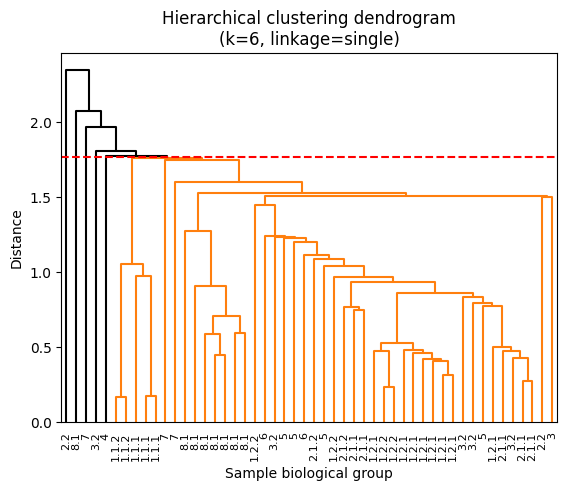

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 4 0 5 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 2]
Singletons:  5
k=6, method=single
Normalized Mutual Information Score: 0.283302181141499
Adjusted Mutual Information Score: 0.056623270114553946
Rand Index: 0.24897959183673468
Adjusted Rand Index: 0.010327022375215147


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


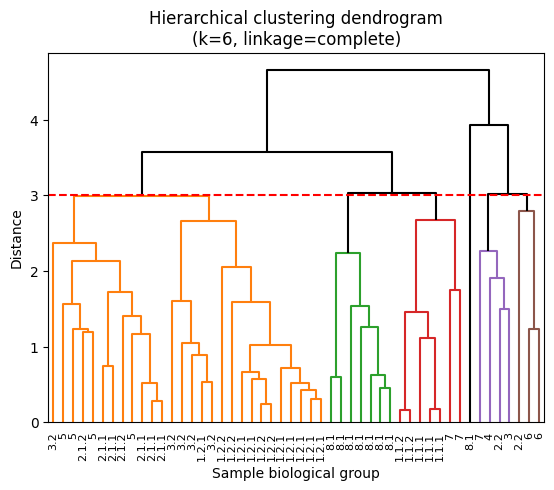

[3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 0 0 0 0 2 0 0 0 0
 1 1 3 3 2 4 4 4 4 4 4 4 5]
Singletons:  1
k=6, method=complete
Normalized Mutual Information Score: 0.6637736110750515
Adjusted Mutual Information Score: 0.5203521633164861
Rand Index: 0.713469387755102
Adjusted Rand Index: 0.2342263722837944


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


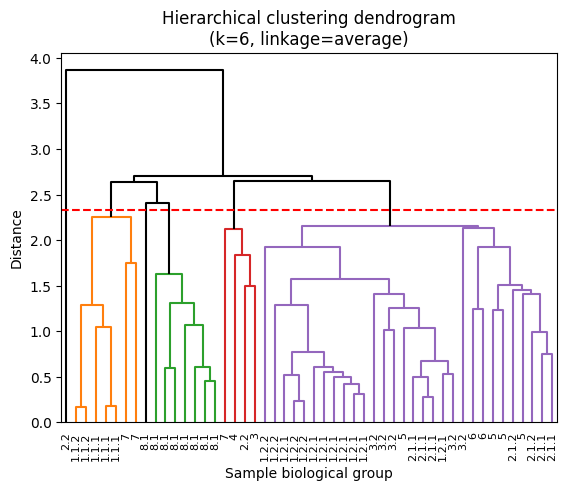

[0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 2 2 2 2 1 2 2 2 2
 2 2 0 0 1 4 4 4 4 4 4 4 5]
Singletons:  2
k=6, method=average
Normalized Mutual Information Score: 0.6299377566584949
Adjusted Mutual Information Score: 0.48194844386284186
Rand Index: 0.6693877551020408
Adjusted Rand Index: 0.19598189470340666


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


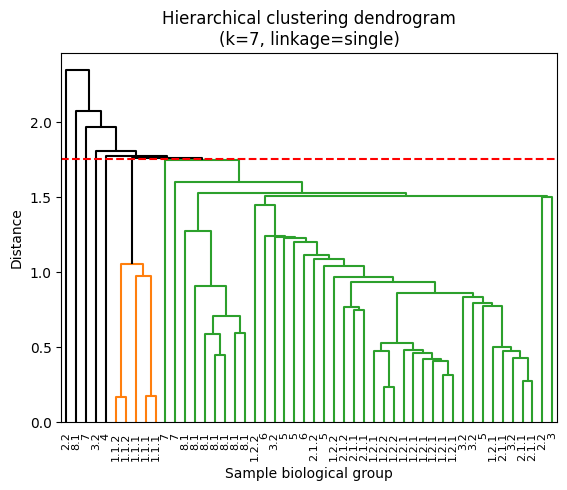

[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 4 0 5 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 6]
Singletons:  5
k=7, method=single
Normalized Mutual Information Score: 0.44461026016850463
Adjusted Mutual Information Score: 0.23394848199504445
Rand Index: 0.4122448979591837
Adjusted Rand Index: 0.0546218487394958


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


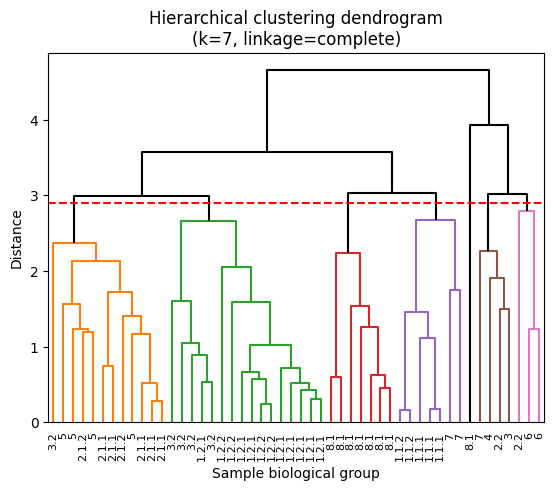

[1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 6 0 6 3 3 3 2 3 6 2 2 2 2
 0 0 1 1 6 4 4 4 4 4 4 4 5]
Singletons:  1
k=7, method=complete
Normalized Mutual Information Score: 0.746908373324517
Adjusted Mutual Information Score: 0.617827180319362
Rand Index: 0.8636734693877551
Adjusted Rand Index: 0.4378618553924869


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


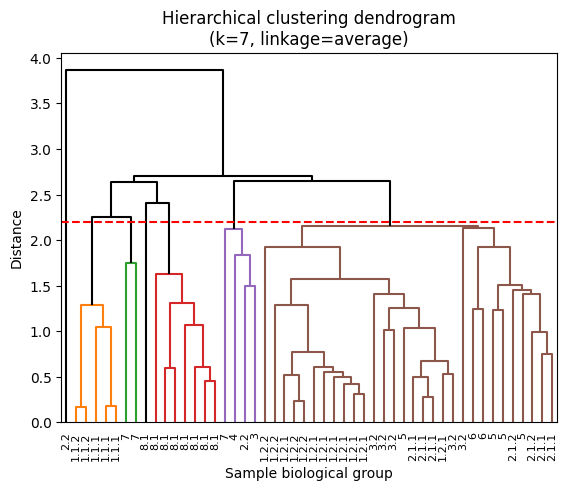

[6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 0 0 0 0 1 0 0 0 0
 0 0 2 2 1 4 4 4 4 4 4 4 5]
Singletons:  2
k=7, method=average
Normalized Mutual Information Score: 0.6561431014374072
Adjusted Mutual Information Score: 0.49995307533595384
Rand Index: 0.6775510204081633
Adjusted Rand Index: 0.20253573447468304


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


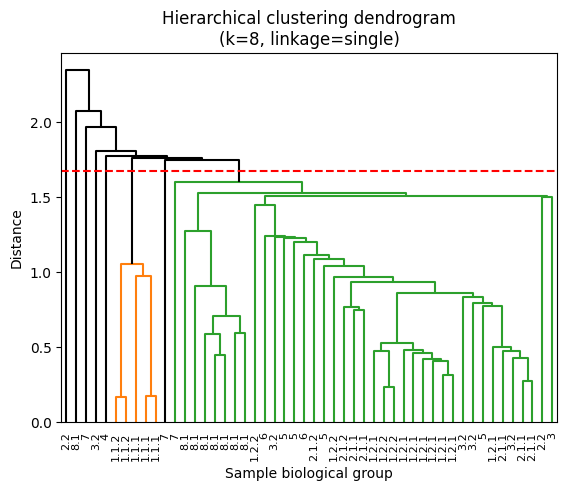

[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 4 0 5 0 0 0 0
 0 0 0 3 1 0 0 0 0 0 0 0 6]
Singletons:  6
k=8, method=single
Normalized Mutual Information Score: 0.4650784603007766
Adjusted Mutual Information Score: 0.24049229573614148
Rand Index: 0.4424489795918367
Adjusted Rand Index: 0.06289446243345591


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


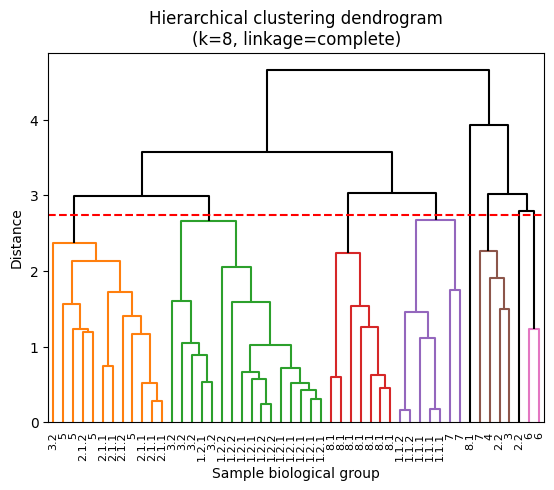

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 6 7 6 1 1 1 2 1 6 2 2 2 2
 3 3 0 0 6 4 4 4 4 4 4 4 5]
Singletons:  2
k=8, method=complete
Normalized Mutual Information Score: 0.7571221018454855
Adjusted Mutual Information Score: 0.6261165871941815
Rand Index: 0.8653061224489796
Adjusted Rand Index: 0.4414353419092756


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


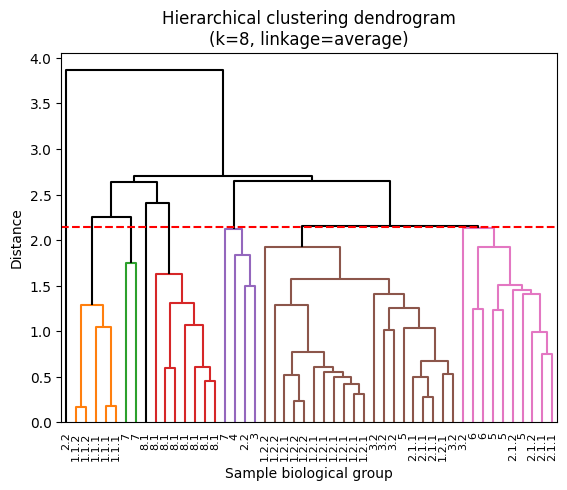

[6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 0 0 1 7 1 3 3 3 0 3 1 0 0 0 3
 0 0 2 2 1 4 4 4 4 4 4 4 5]
Singletons:  2
k=8, method=average
Normalized Mutual Information Score: 0.6847922029338231
Adjusted Mutual Information Score: 0.5163367722882818
Rand Index: 0.8195918367346938
Adjusted Rand Index: 0.3248197482585849


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


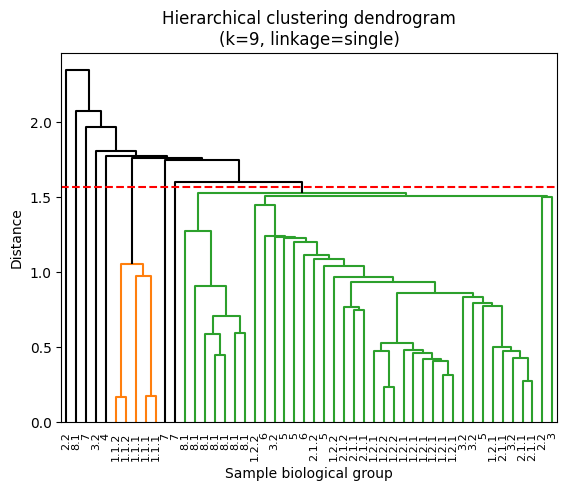

[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 4 0 5 0 0 0 0
 0 0 8 3 1 0 0 0 0 0 0 0 6]
Singletons:  7
k=9, method=single
Normalized Mutual Information Score: 0.5023155915603353
Adjusted Mutual Information Score: 0.27324604279074266
Rand Index: 0.47346938775510206
Adjusted Rand Index: 0.074499225162142


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


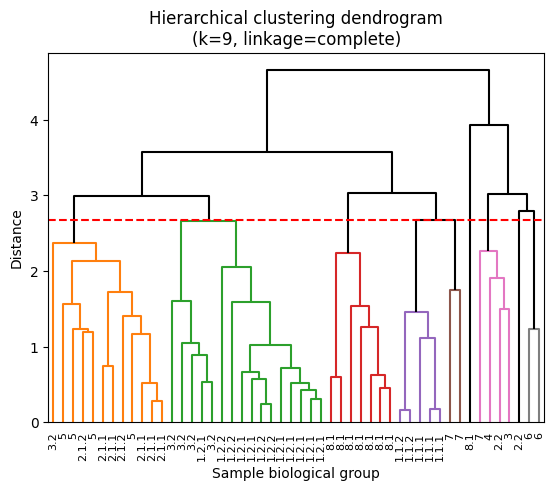

[3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 6 7 6 0 0 0 2 0 6 2 2 2 2
 8 8 4 4 6 1 1 1 1 1 1 1 5]
Singletons:  2
k=9, method=complete
Normalized Mutual Information Score: 0.779068667202944
Adjusted Mutual Information Score: 0.6478300102133707
Rand Index: 0.8734693877551021
Adjusted Rand Index: 0.45993031358885017


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


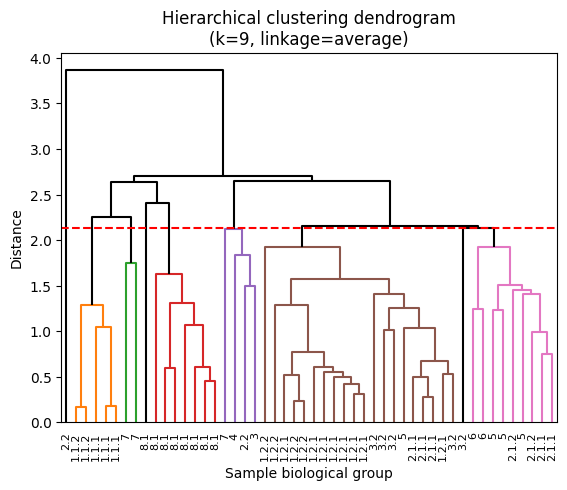

[6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 0 7 0 1 1 1 8 1 0 3 3 3 1
 3 3 2 2 0 4 4 4 4 4 4 4 5]
Singletons:  3
k=9, method=average
Normalized Mutual Information Score: 0.7032912967731507
Adjusted Mutual Information Score: 0.5325015842097527
Rand Index: 0.8269387755102041
Adjusted Rand Index: 0.33700275206404806


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


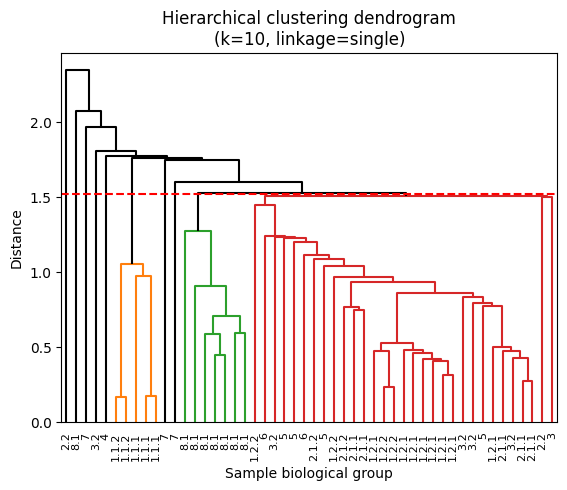

[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 9 0 5 0 0 0 0
 0 0 8 3 4 1 1 1 1 1 1 1 6]
Singletons:  7
k=10, method=single
Normalized Mutual Information Score: 0.6287186464690578
Adjusted Mutual Information Score: 0.4327705177328225
Rand Index: 0.6506122448979592
Adjusted Rand Index: 0.16835069174568632


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


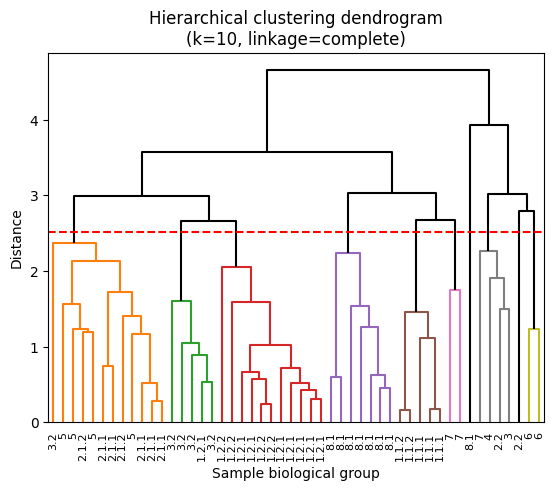

[3 3 3 3 3 6 6 9 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 2 7 2 9 9 9 0 9 2 0 0 0 0
 8 8 4 4 2 1 1 1 1 1 1 1 5]
Singletons:  2
k=10, method=complete
Normalized Mutual Information Score: 0.8018969008632892
Adjusted Mutual Information Score: 0.6671314779034494
Rand Index: 0.9069387755102041
Adjusted Rand Index: 0.526578073089701


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


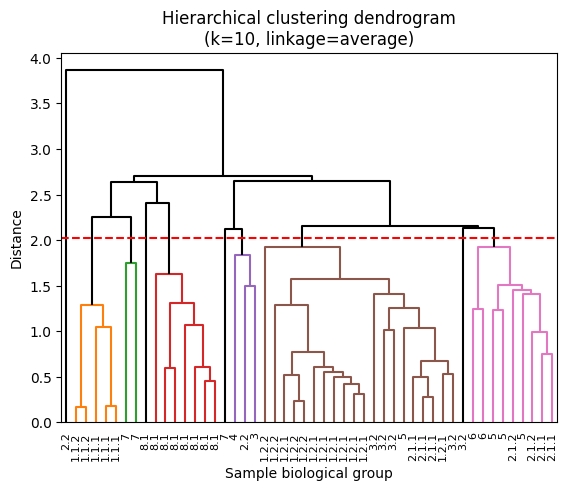

[6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 3 7 3 0 0 0 8 0 3 1 1 1 0
 1 1 2 2 9 4 4 4 4 4 4 4 5]
Singletons:  4
k=10, method=average
Normalized Mutual Information Score: 0.7158337947648238
Adjusted Mutual Information Score: 0.5422986536222442
Rand Index: 0.8293877551020408
Adjusted Rand Index: 0.34119278779472956


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


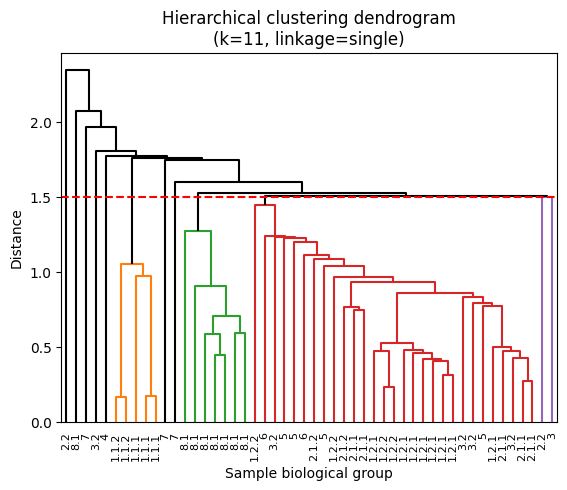

[ 2  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  7  0  1  1  1  9  1  5  1  1  1  1  1  1  8  3 10  4  4  4  4  4  4
  4  6]
Singletons:  7
k=11, method=single
Normalized Mutual Information Score: 0.6740421283366712
Adjusted Mutual Information Score: 0.48310843709843804
Rand Index: 0.6979591836734694
Adjusted Rand Index: 0.20587225274725274


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


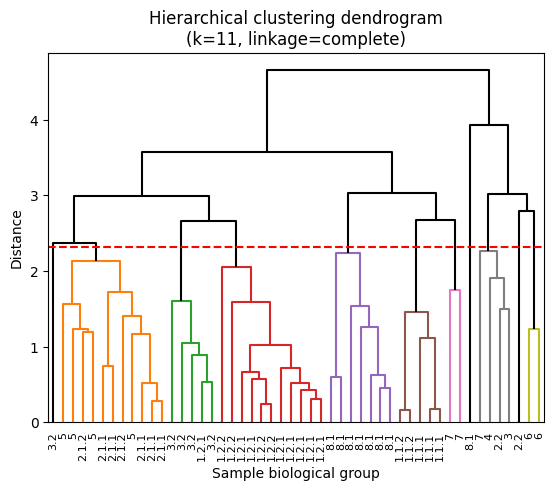

[ 3  3  3  3  3  6  6  9  6  6  6  6  6  6  6  6  6  2  2  2  2  2  2  2
  0  7  0  9  9  9 10  9  0  2  2  2  2  8  8  4  4  0  1  1  1  1  1  1
  1  5]
Singletons:  3
k=11, method=complete
Normalized Mutual Information Score: 0.8189336840856178
Adjusted Mutual Information Score: 0.6877153286713948
Rand Index: 0.9159183673469388
Adjusted Rand Index: 0.5551908792537571


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


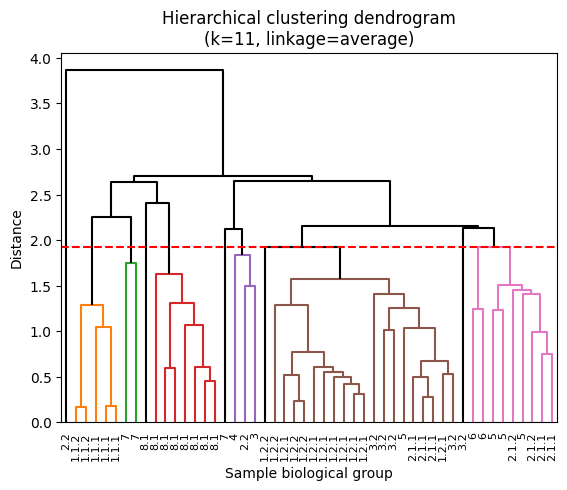

[ 6  6  6  6  6  3  3  3  3  3  3  3  3  3  3 10  3  0  3  3  3  0  0  0
  1  7  1  3  3  3  8  3  1  0  0  0  3  0  0  2  2  9  4  4  4  4  4  4
  4  5]
Singletons:  5
k=11, method=average
Normalized Mutual Information Score: 0.7165203209535987
Adjusted Mutual Information Score: 0.5312451439408757
Rand Index: 0.84
Adjusted Rand Index: 0.34944237918215615


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


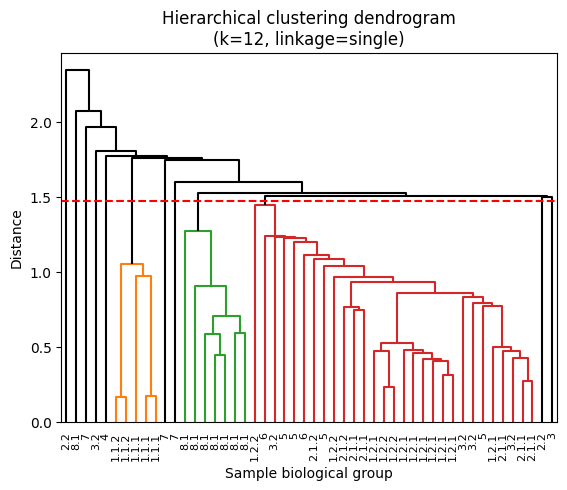

[ 2  2  2  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 11  7 10  0  0  0  9  0  5  0  0  0  0  0  0  8  3  4  1  1  1  1  1  1
  1  6]
Singletons:  9
k=12, method=single
Normalized Mutual Information Score: 0.6822005058857956
Adjusted Mutual Information Score: 0.4880949173754797
Rand Index: 0.6987755102040817
Adjusted Rand Index: 0.2065881138728821


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


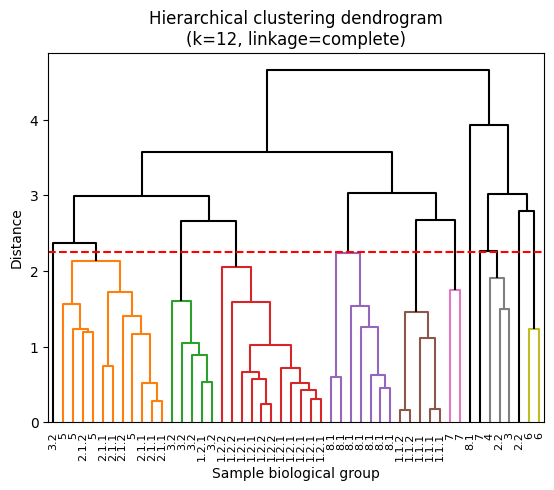

[ 3  3  3  3  3  6  6  9  6  6  6  6  6  6  6  6  6  2  2  2  2  2  2  2
  1  7  1  9  9  9 10  9  1  2  2  2  2  8  8  4  4 11  0  0  0  0  0  0
  0  5]
Singletons:  4
k=12, method=complete
Normalized Mutual Information Score: 0.8298858563622757
Adjusted Mutual Information Score: 0.7001803660753315
Rand Index: 0.9183673469387755
Adjusted Rand Index: 0.5633950401676563


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


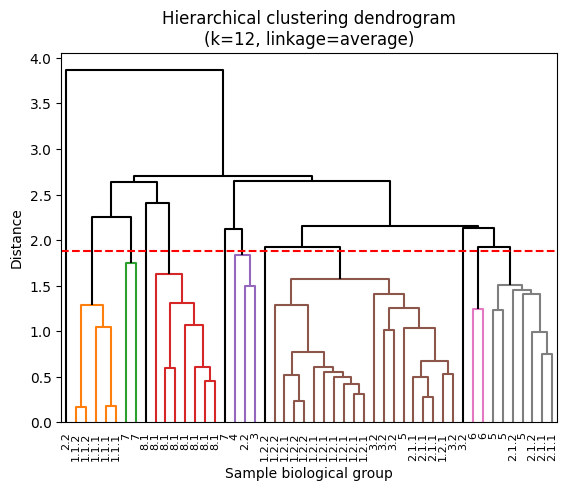

[ 6  6  6  6  6  3  3  3  3  3  3  3  3  3  3 10  3  4  3  3  3  4  4  4
  0  7  0  3  3  3  8  3  0  4  4  4  3  5  5  2  2  9  1  1  1  1  1  1
  1 11]
Singletons:  5
k=12, method=average
Normalized Mutual Information Score: 0.7422839473334398
Adjusted Mutual Information Score: 0.5577781475494075
Rand Index: 0.8514285714285714
Adjusted Rand Index: 0.3713733075435203


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


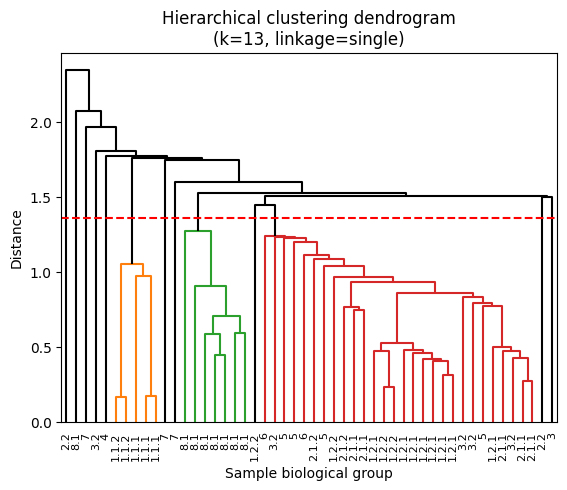

[ 2  2  2  2  2  1  1  1  1  1  1  1  1  1  1 12  1  1  1  1  1  1  1  1
 11  7 10  1  1  1  9  1  5  1  1  1  1  1  1  8  3  4  0  0  0  0  0  0
  0  6]
Singletons:  10
k=13, method=single
Normalized Mutual Information Score: 0.6846352853440132
Adjusted Mutual Information Score: 0.47856980755053274
Rand Index: 0.7167346938775511
Adjusted Rand Index: 0.2141498324123562


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


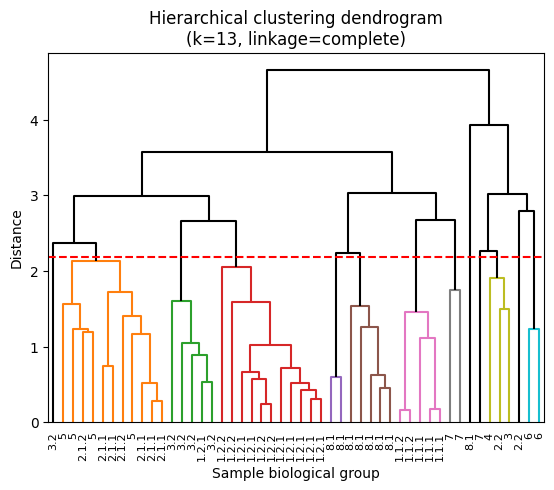

[ 3  3  3  3  3  2  2  9  2  2  2  2  2  2  2  2  2  0  0  0  0  0  0  0
  1  7  1  9  9  9 10  9  1  0  0  0  0  8  8  4  4 11  6  6  6  6  5  6
  5 12]
Singletons:  4
k=13, method=complete
Normalized Mutual Information Score: 0.8141161069804744
Adjusted Mutual Information Score: 0.660835084225587
Rand Index: 0.9102040816326531
Adjusted Rand Index: 0.5014503263234228


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


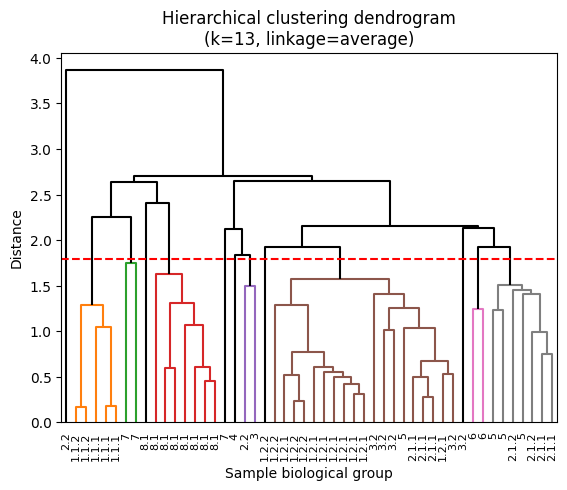

[ 6  6  6  6  6  3  3  3  3  3  3  3  3  3  3 10  3  4  3  3  3  4  4  4
  2  7  2  3  3  3  8  3 12  4  4  4  3  5  5  0  0  9  1  1  1  1  1  1
  1 11]
Singletons:  6
k=13, method=average
Normalized Mutual Information Score: 0.7523768188500668
Adjusted Mutual Information Score: 0.5667227550015427
Rand Index: 0.8530612244897959
Adjusted Rand Index: 0.3746525847693163


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


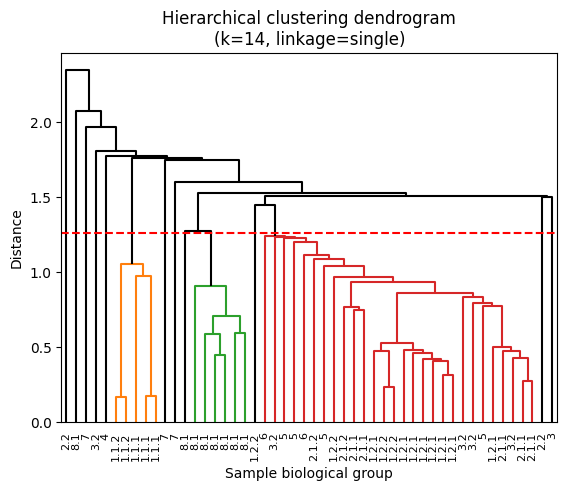

[ 2  2  2  2  2  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0
 11  7 10  0  0  0  9  0  5  0  0  0  0  0  0  8  3  4 13  1  1  1  1  1
  1  6]
Singletons:  11
k=14, method=single
Normalized Mutual Information Score: 0.6727633633745153
Adjusted Mutual Information Score: 0.4444746361112566
Rand Index: 0.7118367346938775
Adjusted Rand Index: 0.19133143956748833


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


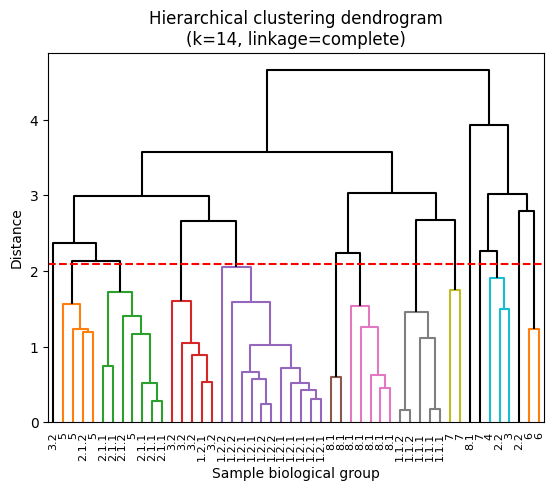

[ 3  3  3  3  3  0  0  9  0  0  0  0  0  0  0  0  0  2  2  2  2  2  6  2
  1  7  1  9  9  9 10  9  1  6  6  6  2  8  8  4  4 11 13 13 13 13  5 13
  5 12]
Singletons:  4
k=14, method=complete
Normalized Mutual Information Score: 0.8185638735253163
Adjusted Mutual Information Score: 0.6527439040966964
Rand Index: 0.926530612244898
Adjusted Rand Index: 0.5434253246753247


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


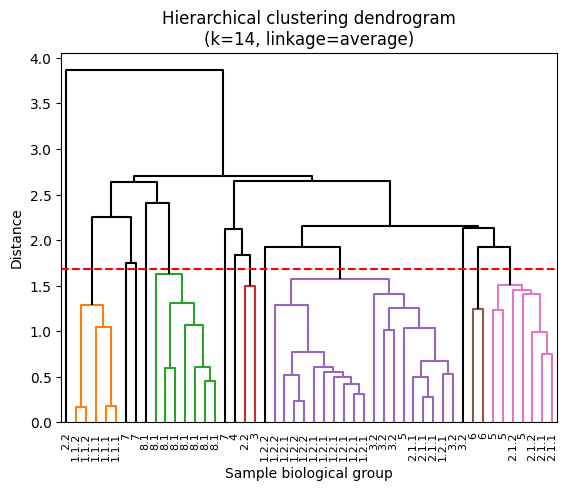

[ 6  6  6  6  6  1  1  1  1  1  1  1  1  1  1 10  1  4  1  1  1  4  4  4
  2  7  2  1  1  1  8  1 12  4  4  4  1  5  5 13  3  9  0  0  0  0  0  0
  0 11]
Singletons:  8
k=14, method=average
Normalized Mutual Information Score: 0.7472259470623273
Adjusted Mutual Information Score: 0.5510522937791194
Rand Index: 0.8522448979591837
Adjusted Rand Index: 0.3693379790940767


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


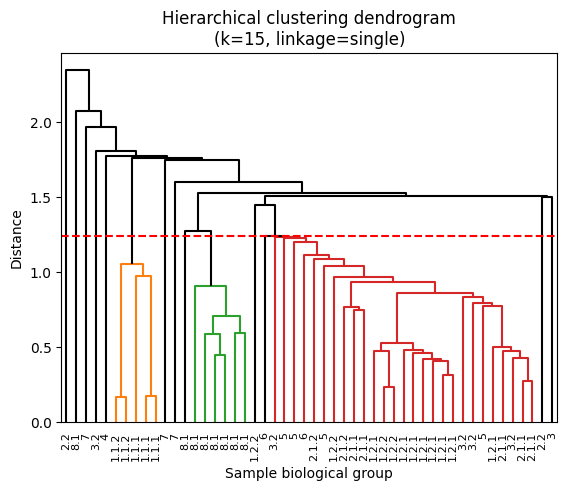

[ 2  2  2  2  2  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0
 11  7 10  0  0  0  9  0  5  0  0  0  0  0 14  8  3  4 13  1  1  1  1  1
  1  6]
Singletons:  12
k=15, method=single
Normalized Mutual Information Score: 0.6842002144084666
Adjusted Mutual Information Score: 0.449840463140242
Rand Index: 0.7322448979591837
Adjusted Rand Index: 0.2074231587086797


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


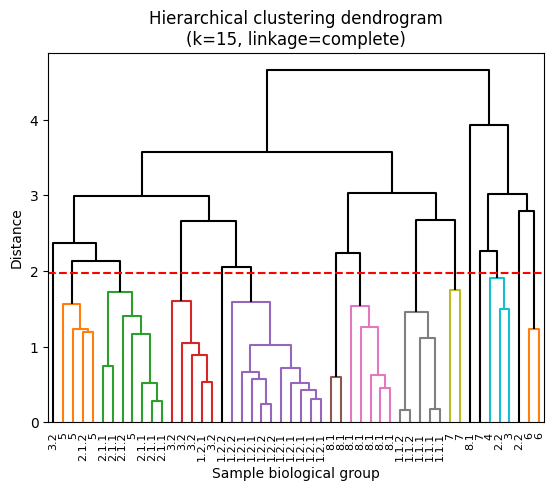

[ 3  3  3  3  3  9  9  4  9  9  9  9  9  9  9 14  9  2  2  2  2  2  6  2
  0  7  0  4  4  4 10  4  0  6  6  6  2  8  8  1  1 11 13 13 13 13  5 13
  5 12]
Singletons:  5
k=15, method=complete
Normalized Mutual Information Score: 0.816226023017794
Adjusted Mutual Information Score: 0.6388619312129756
Rand Index: 0.929795918367347
Adjusted Rand Index: 0.5442984315387877


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


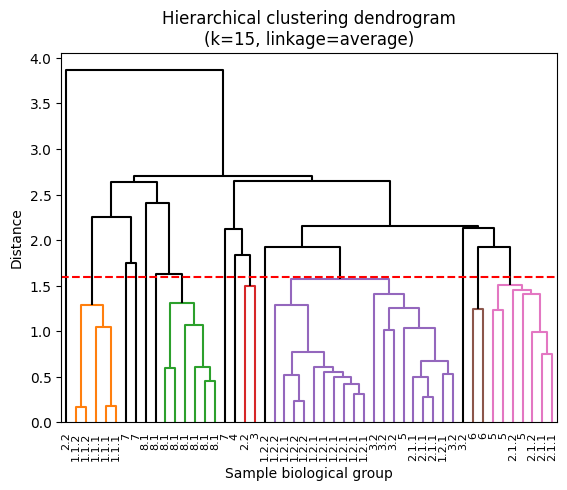

[ 6  6  6  6  6  0  0  0  0  0  0  0  0  0  0 10  0  1  0  0  0  1  1  1
  2  7  2  0  0  0  8  0 12  1  1  1  0  5  5 13  3  9 14  4  4  4  4  4
  4 11]
Singletons:  9
k=15, method=average
Normalized Mutual Information Score: 0.7368871324792011
Adjusted Mutual Information Score: 0.520632714680602
Rand Index: 0.8473469387755102
Adjusted Rand Index: 0.3367853596254788


In [207]:
for k in range(5,16):
    for linkage_method in ['single', 'complete', 'average']:
        labels = hier_clust(mixed_distances, k, linkage_method)
        print(labels)
        print("Singletons: ",(np.unique(labels, return_counts=True)[1] == 1).sum())
        print(f"k={k}, method={linkage_method}")
        print(f"Normalized Mutual Information Score: {normalized_mutual_info_score(groups, labels, average_method='geometric')}")
        print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(groups, labels, average_method='geometric')}")
        print(f"Rand Index: {rand_score(groups, labels)}")
        print(f"Adjusted Rand Index: {adjusted_rand_score(groups, labels)}")

### Subtask d

In [220]:
final_labels = AgglomerativeClustering(n_clusters=12, linkage='complete', compute_distances=True, metric='precomputed').fit_predict(mixed_distances)
birds['predicted_group'] = final_labels
birds['group'] = groups
birds

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI,group,group_ID,predicted_group
species,,,,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.152727,0.334204,0.022779,0.214481,0.879054,laridae,1.1.1,3
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.327273,0.558747,0.093394,0.343958,0.670654,laridae,1.1.1,3
isolokki,0.785714,0.222222,bluish grey,white,B,0.367273,0.624021,0.125285,0.400416,0.671464,laridae,1.1.1,3
kalatiira,0.974790,0.027778,grey,white,B,0.174545,0.242820,0.008884,0.000000,0.446080,sternidae,1.1.2,3
lapintiira,0.939076,0.009259,grey,white,B,0.145455,0.224543,0.007745,0.015081,0.526316,sternidae,1.1.2,3
suokukko,0.468487,0.083333,dappled brown,white,C,0.076364,0.099217,0.007745,0.144386,0.405667,scolopacidae,1.2.1,6
taivaanvuohi,0.296218,0.101852,dappled brown,white,C,0.080000,0.070496,0.006834,0.109788,0.239971,scolopacidae,1.2.1,6
lehtokurppa,0.247899,0.166667,dappled brown,dappled beige,C,0.145455,0.164491,0.025513,0.274415,0.306220,scolopacidae,1.2.1,9
karikukko,0.569328,0.125000,black-brown,white,C,0.054545,0.091384,0.007745,0.222778,0.527379,scolopacidae,1.2.1,6


Describe clusters by numerical features.

In [221]:
birds[list(num_cols)+["predicted_group"]].groupby('predicted_group').agg(['mean', 'std'])

AR               wload           mean_length            \
                     mean       std      mean       std        mean       std   
predicted_group                                                                 
0                0.288415  0.138643  0.085979  0.068139    0.254026  0.052588   
1                0.413866  0.031090  0.396605  0.021879    0.600000  0.119226   
2                0.513369  0.146813  0.477273  0.161619    0.202314  0.061049   
3                0.849580  0.099259  0.106481  0.103107    0.233455  0.105404   
4                0.258403  0.044566  0.148148  0.065473    0.509091  0.102852   
5                0.142857       NaN  0.231481       NaN    0.538182       NaN   
6                0.494652  0.137919  0.066919  0.040644    0.049917  0.035706   
7                0.670168       NaN  0.912037       NaN    1.000000       NaN   
8                0.966387  0.047537  0.837963  0.229155    0.350909  0.023142   
9                0.152521  0.093477  0.156481  0.063343    0.101091  0.042125   
10               0.254202       NaN  0.453704       NaN    0.160000       NaN   
11               0.401261       NaN  0.314815       NaN    0.672727       NaN   

                mean_wspan           mean_weight                 BMI  \
                      mean       std        mean       std      mean   
predicted_group                                                        
0                 0.446848  0.120137    0.061438  0.028376  0.300037   
1                 0.714534  0.178929    0.328778  0.107938  0.487960   
2                 0.199858  0.067334    0.058024  0.025386  0.428885   
3                 0.396867  0.183818    0.051617  0.054210  0.194787   
4                 0.582245  0.184623    0.106606  0.019973  0.158155   
5                 0.973890       NaN    0.498861       NaN  1.000000   
6                 0.078092  0.063554    0.005537  0.004446  0.138944   
7                 1.000000       NaN    1.000000       NaN  0.639363   
8                 0.403394  0.038771    0.186788  0.054765  0.704662   
9                 0.102872  0.043596    0.016629  0.009458  0.248872   
10                0.242820       NaN    0.066059       NaN  0.761311   
11                0.882507       NaN    0.293850       NaN  0.326960   

                                WSI            
                      std      mean       std  
predicted_group                                
0                0.104560  0.682550  0.192011  
1                0.097334  0.297351  0.171075  
2                0.115053  0.206926  0.089679  
3                0.183820  0.638713  0.165527  
4                0.143726  0.253169  0.096394  
5                     NaN  0.776087       NaN  
6                0.061150  0.490028  0.208418  
7                     NaN  0.124245       NaN  
8                0.160457  0.277291  0.022317  
9                0.057467  0.283545  0.086842  
10                    NaN  0.515712       NaN  
11                    NaN  0.388561       NaN

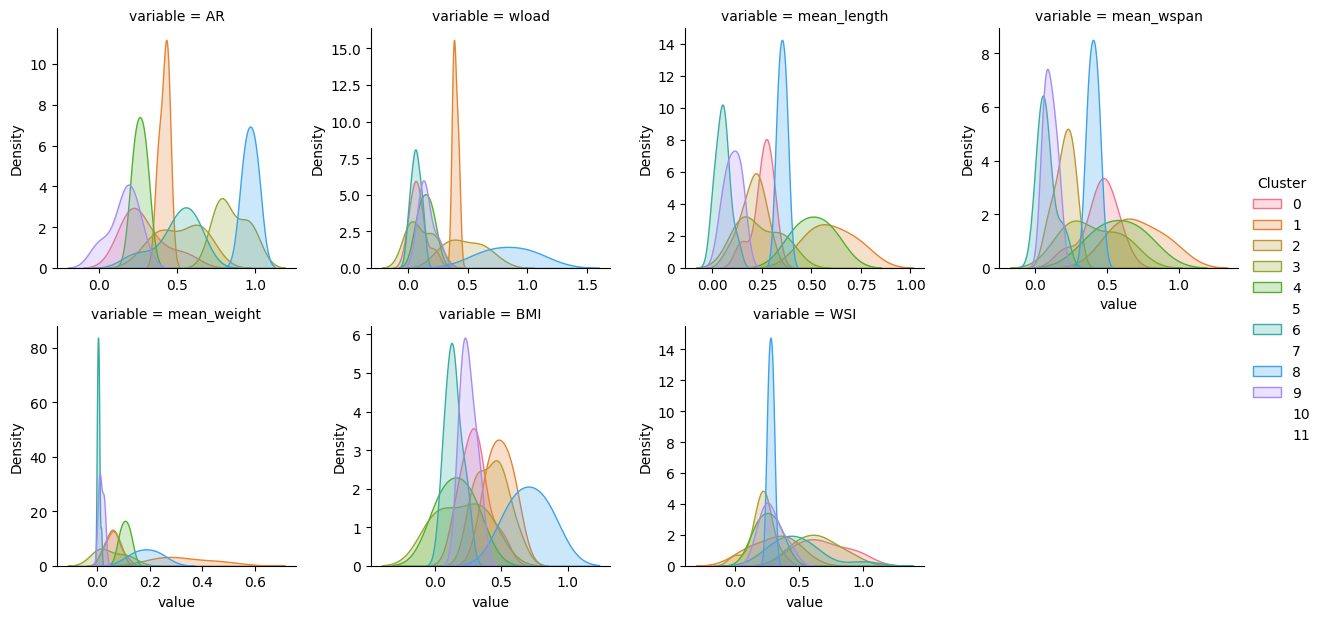

In [222]:
num_data = birds[list(num_cols) + ["predicted_group"]].copy()
df = pd.melt(num_data, num_data.columns[-1], num_data.columns[:-1])

g = sns.FacetGrid(
    df,
    col="variable",
    hue="predicted_group",
    col_wrap=4,
    height=8/2.54,
    sharex=False,
    sharey=False,
    legend_out=True
)
g.map(sns.kdeplot, "value", fill=True, warn_singular=False)
g.add_legend(title="Cluster")  
plt.show()

Describe clusters by categorical features.

In [223]:
for col in categ_cols:
    print(f"\nFeature: {col}")
    display(pd.crosstab(birds['predicted_group'], birds[col], normalize='index') * 100)


Feature: back


back,beige,black,black-brown,black-white,blackish grey,bluish grey,brown,brownish black,dappled brown,dark brown,grey,greyish black,greyish brown,light grey,white
predicted_group,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,14.285714,0.0,0.000000,42.857143,14.285714,0.0,28.571429,0.0,0.0
1,0.000000,33.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,33.333333,0.000000,33.333333,0.0,0.000000,0.0,0.0
2,9.090909,18.181818,0.000000,0.0,18.181818,0.0,0.000000,0.0,45.454545,9.090909,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,40.0,0.000000,0.0,0.000000,0.000000,40.000000,0.0,0.000000,20.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,50.000000,0.000000,0.000000,0.0,0.000000,50.0,0.0
5,0.000000,0.000000,0.000000,0.0,0.000000,0.0,100.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
6,0.000000,9.090909,9.090909,0.0,0.000000,0.0,9.090909,0.0,54.545455,0.000000,0.000000,0.0,18.181818,0.0,0.0
7,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,100.0
8,0.000000,0.000000,0.000000,50.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,50.000000,0.0,0.0



Feature: belly


belly,beige,black,black-white,brown,brown-white,dappled beige,dappled brown,dark brown,dark grey,grey,greyish black,greyish white,light grey,reddish brown,white
predicted_group,,,,,,,,,,,,,,,
0,0.000000,0.000000,28.571429,14.285714,42.857143,0.0,0.0,14.285714,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,33.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,33.333333,0.0,0.0,33.333333,0.000000,0.000000
2,45.454545,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.181818,0.0,0.000000,0.0,0.0,0.000000,18.181818,18.181818
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,50.0,0.000000,0.0,0.000000,0.0,50.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,9.090909,9.090909,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,81.818182
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.000000



Feature: ftype


ftype,A,B,C
predicted_group,,,
0,100.0,0.0,0.0
1,0.0,0.0,100.0
2,0.0,0.0,100.0
3,0.0,100.0,0.0
4,0.0,100.0,0.0
5,100.0,0.0,0.0
6,0.0,0.0,100.0
7,0.0,0.0,100.0
8,0.0,0.0,100.0
